In [2]:
# м1 — 3228965

In [3]:
import shapely.geometry as geometry
from shapely.ops import linemerge, unary_union, polygonize

In [4]:
import overpy

api = overpy.Overpass(url='https://maps.mail.ru/osm/tools/overpass/api/interpreter')

In [5]:
result = api.query("""relation(3228965); out body; >; out skel qt;""")

In [6]:
result.ways

[<overpy.Way id=47010212 nodes=[287866275, 7573511734, 10030517750, 596630312, 148905456]>,
 <overpy.Way id=47010208 nodes=[87720844, 2702235154, 8883746873, 9425293244, 9425293245, 8883746872, 63120699, 2702243152, 10030517737, 590201756]>,
 <overpy.Way id=1016671899 nodes=[480825896, 10030517736, 224282260, 4442981251, 299218265, 596630361, 10030517805, 7573511725, 596630318, 10030517735, 287866275]>,
 <overpy.Way id=1016671898 nodes=[590201756, 480825896]>,
 <overpy.Way id=157616999 nodes=[1251642869, 679848584, 10287521670, 8184085602, 10287521667, 2060575880, 3961320415, 7556705057, 800695432, 1877505733, 1274515662, 3647139822, 5293389842, 3647139815, 2412042823, 1251642868, 8570506809, 7222876499]>,
 <overpy.Way id=773802308 nodes=[7222876499, 4136338850, 3224206706, 4136338497, 1251642864, 3481651720, 3481651683, 305143158, 1207965280, 1251642866]>,
 <overpy.Way id=28089296 nodes=[303471848, 308489051]>,
 <overpy.Way id=28089311 nodes=[148905464, 308489031]>,
 <overpy.Way id=28

In [7]:
lss = [] #convert ways to linstrings

for ii_w, way in enumerate(result.ways):
    ls_coords = []


    for node in way.nodes:
        ls_coords.append((node.lat, node.lon)) # create a list of node coordinates
        
    lss.append(geometry.LineString(ls_coords)) # create a LineString from coords


merged = linemerge([*lss]) # merge LineStrings

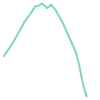

In [8]:
merged

In [9]:
import folium

coordinates = list(merged.coords)

# Create the map and add the line
m = folium.Map(location=[55.8188592, 37.4549747], zoom_start=12, tiles='cartodbpositron')
my_PolyLine=folium.PolyLine(locations=coordinates, weight=5)
m.add_child(my_PolyLine)